In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy
import scipy.signal
from mpl_toolkits import mplot3d
from functions import *
data = np.loadtxt("lff.dat")

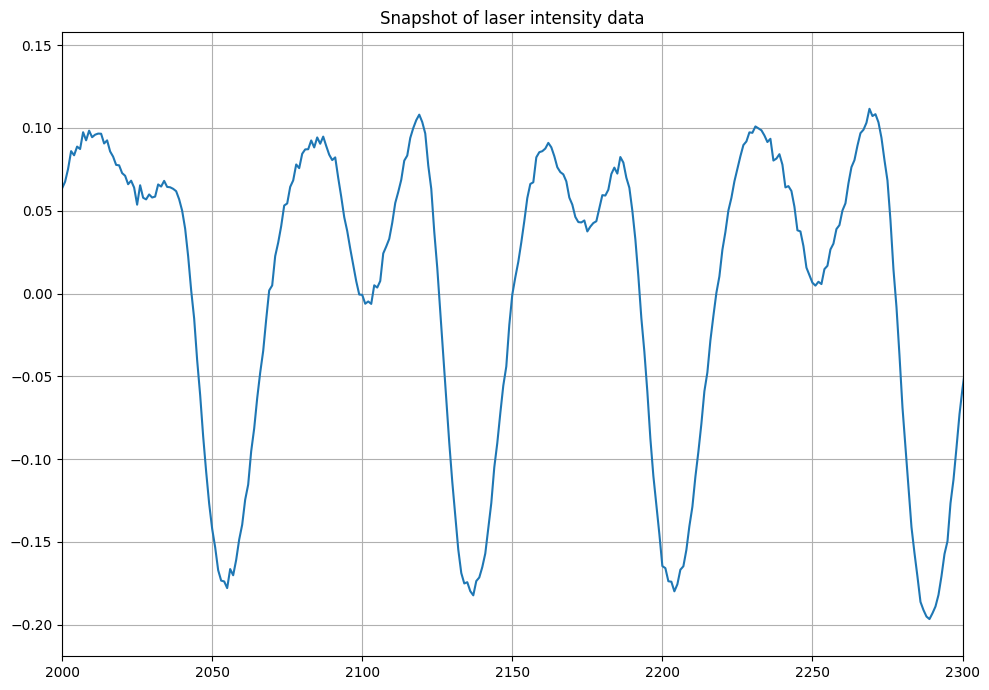

In [61]:

plt.plot(data)
plt.title("Snapshot of laser intensity data")
plt.grid()
plt.xlim((2000,2300))

plt.show()


In [71]:
# count the number of spikes 
thresh = -0.03
intervals = np.diff([x for x in range(len(data)-1) if data[x] < thresh and data[x+1] > thresh])
print(n:=len(intervals))

710


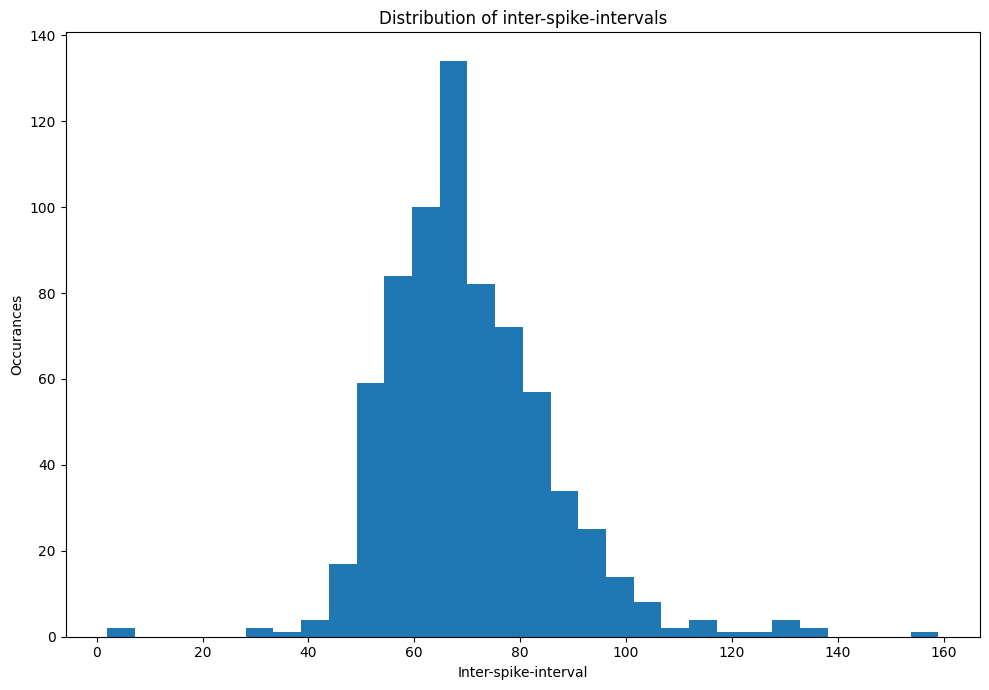

In [72]:
#Plot the histogram of data values and calculate the moments of the distribution.
plt.hist(intervals, 30)
plt.xlabel('Inter-spike-interval')
plt.ylabel('Occurances')
plt.title('Distribution of inter-spike-intervals')
plt.show()


In [73]:
#The four moments of distribution are: Mean, Variance, Skewness, Kurtosis, Coefficient of Variation

S = np.std(intervals)
median = np.median(intervals)
mean = np.mean(intervals)
variance = np.var(intervals)
skewness = scipy.stats.skew(intervals)
kurtosis = scipy.stats.kurtosis(intervals)
CoV = S/abs(mean)
print(median)
print(mean)
print(skewness)
print(kurtosis)
print(CoV)

68.0
70.33380281690141
0.9201086810263118
3.6182666408308775
0.22178424810059885


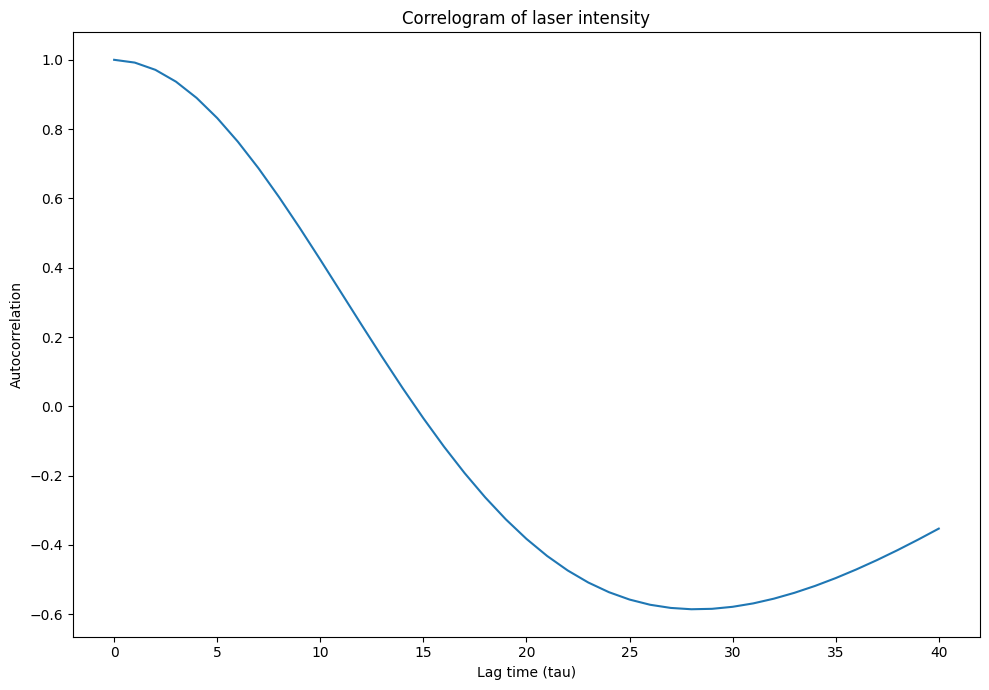

In [87]:
# Calculate and plot the autocorrelation function.

def ACF(data, tau):

    N = len(data)
    mean = np.mean(data)
    std = np.std(data)
    acf = 1 / ((std**2) *(N-tau)) * sum([(data[t] - mean) * (data[t+tau]) for t in range(1, N-tau)])
    return acf

max_lag = 40
lags = np.arange(max_lag+1)
acf = np.zeros_like(lags, dtype=float)
for tau in lags:
    acf[tau] = np.mean(ACF(data, tau))

# Plot autocorrelation vs. lag time
plt.plot(lags, acf)
plt.xlabel('Lag time (tau)')
plt.ylabel('Autocorrelation')
plt.title('Correlogram of laser intensity')
plt.show()

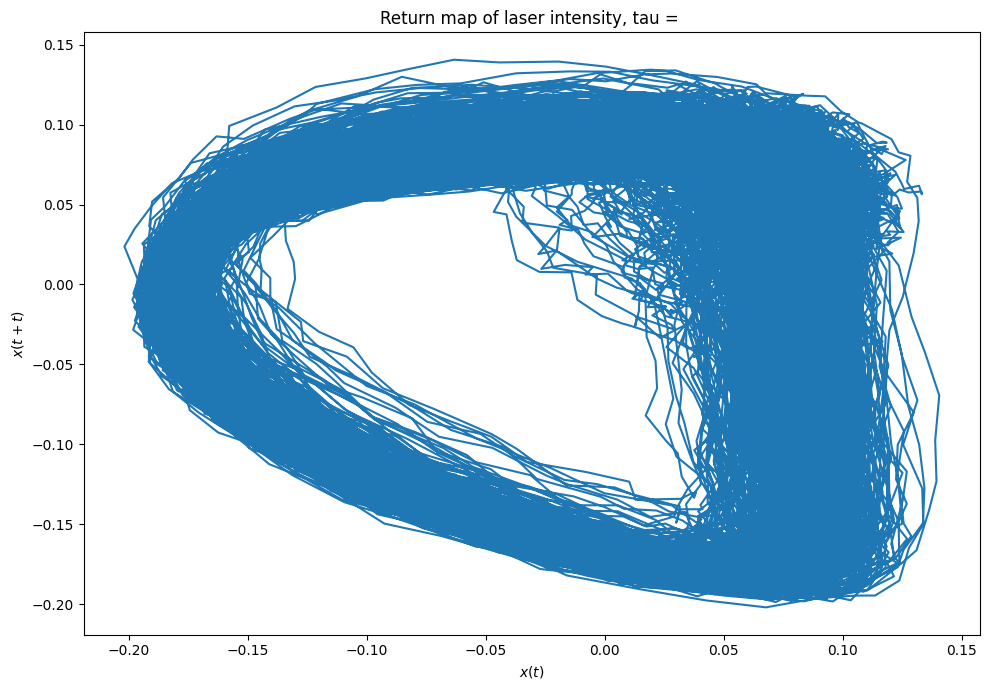

In [85]:
def return_map(data, tau):
    plt.rcParams["figure.figsize"] = [10.00, 7]
    plt.rcParams["figure.autolayout"] = True
    plt.plot(data[:-(tau)], data[tau:])
    plt.xlabel("$x(t)$")
    plt.ylabel("$x(t+t)$")

    plt.title("Return map of laser intensity, tau = ")
return_map(data, 14)


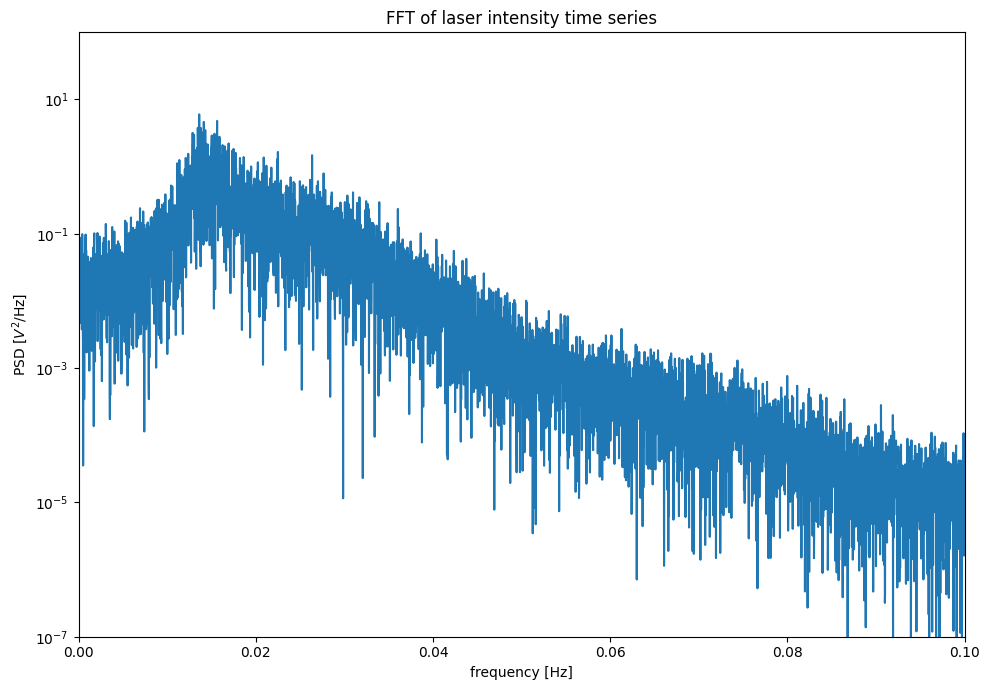

71.42857142857143


In [82]:
(f, S) = scipy.signal.periodogram(data, 1, scaling='density')
plt.semilogy(f, S)
plt.ylim([1e-7, 1e2])
plt.xlim([0,0.1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [$V^2$/Hz]')
plt.title("FFT of laser intensity time series")
plt.show()
print((ISI:=1000/14))

As we can see, the peak of the lower range of the PSD seems to coincide with 1/ISI, which is 0.014

Reconstruct the attractor from peaks of the PSD:

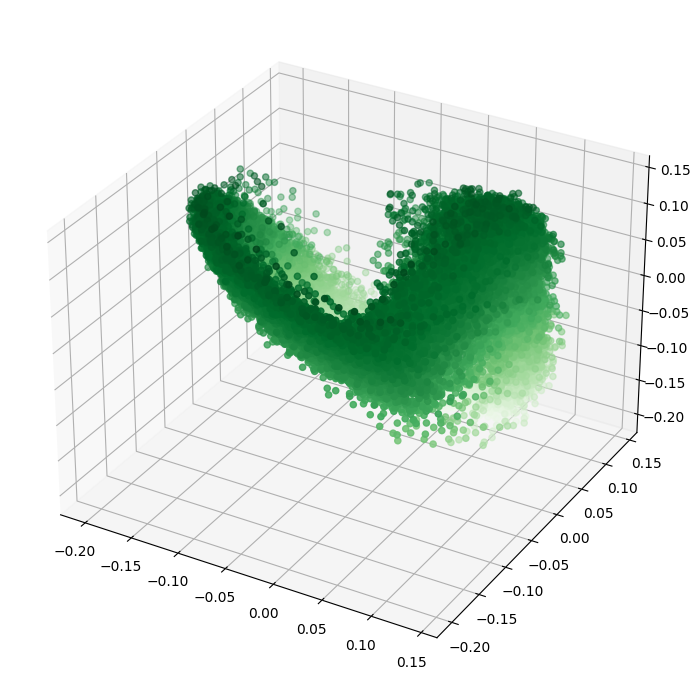

In [89]:
tau = int(14)

ax = plt.axes(projection='3d')

zline = data[:-(2*tau)]
xline = data[tau:-(tau)]
yline = data[2*tau:]
ax.scatter3D(xline, yline, zline, c=zline, cmap='Greens')

Blubb

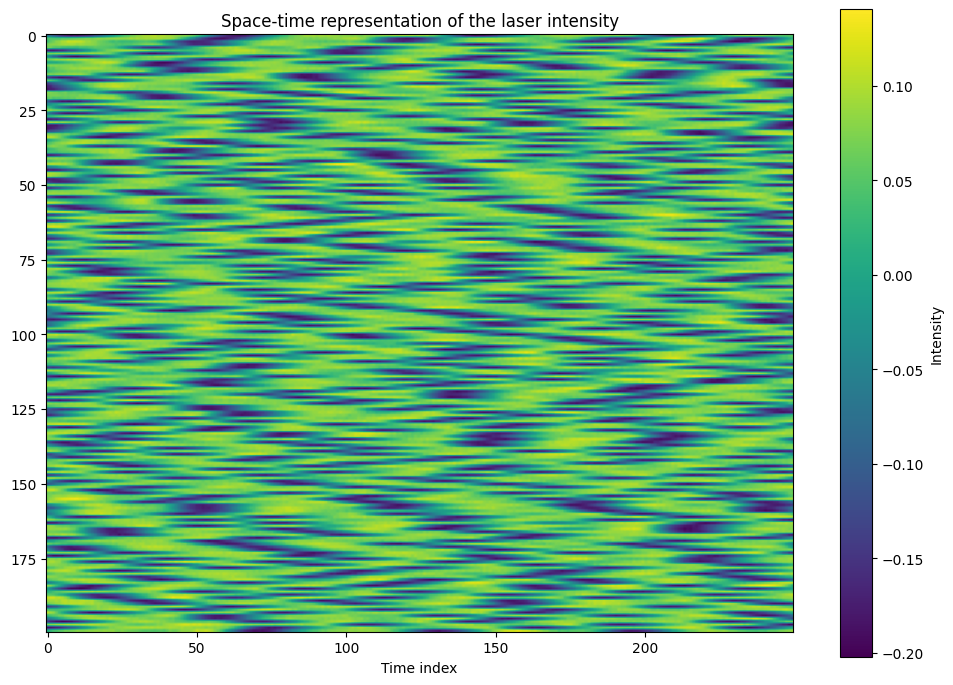

In [95]:
A = np.reshape(data, (200, 250))

plt.imshow(A, cmap='viridis')
colorbar = plt.colorbar()
colorbar.set_label('Intensity')
plt.xlabel("Time index")
plt.title("Space-time representation of the laser intensity")
plt.show()